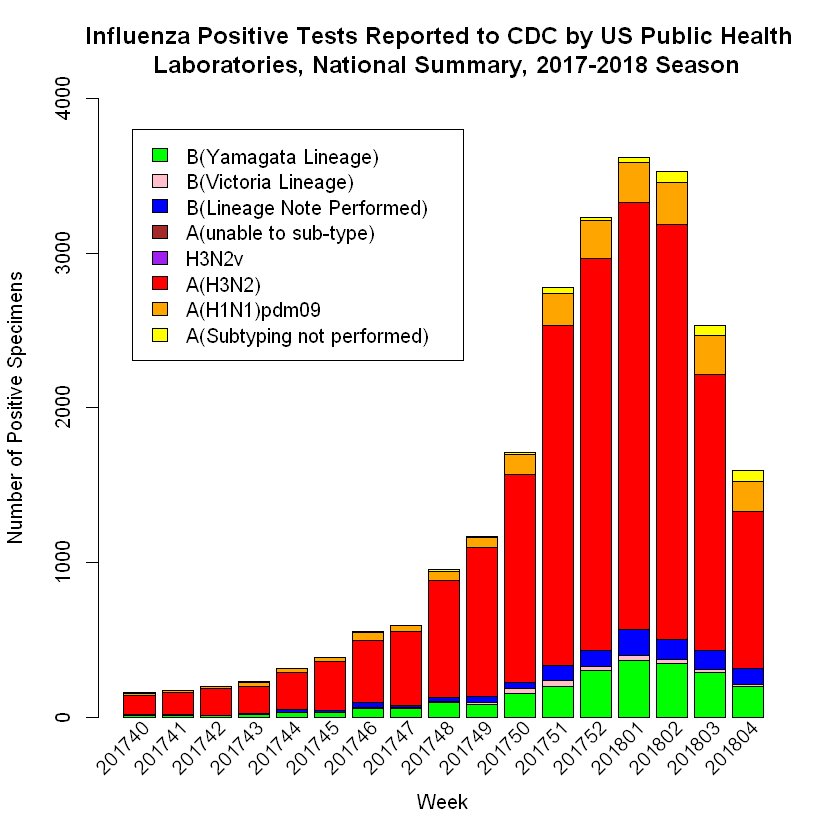

In [1]:
#Problem 1 Influenza Positive Test Reported

#Load Influenza Positive Test Reported file
lineage<-read.csv(file.choose(), header=T)

lineage1<-as.matrix(lineage[,2:9])
xlabel<-c(lineage$Week)
type=c("B(Yamagata Lineage)","B(Victoria Lineage)","B(Lineage Note Performed)","A(unable to sub-type)","H3N2v","A(H3N2)","A(H1N1)pdm09","A(Subtyping not performed)")
colors <- c("green","pink","blue","brown","purple","red","orange","yellow")
k=barplot(t(lineage1),main = "Influenza Positive Tests Reported to CDC by US Public Health \n Laboratories, National Summary, 2017-2018 Season",xlab = "Week",ylab = "Number of Positive Specimens",
        ylim = c(0,4000),col = colors)
legend("topleft", inset=.05, type, fill=colors)
text(k, labels = xlabel,par("usr")[3], srt = 45, adj = c(1,1), xpd = TRUE, cex=1)

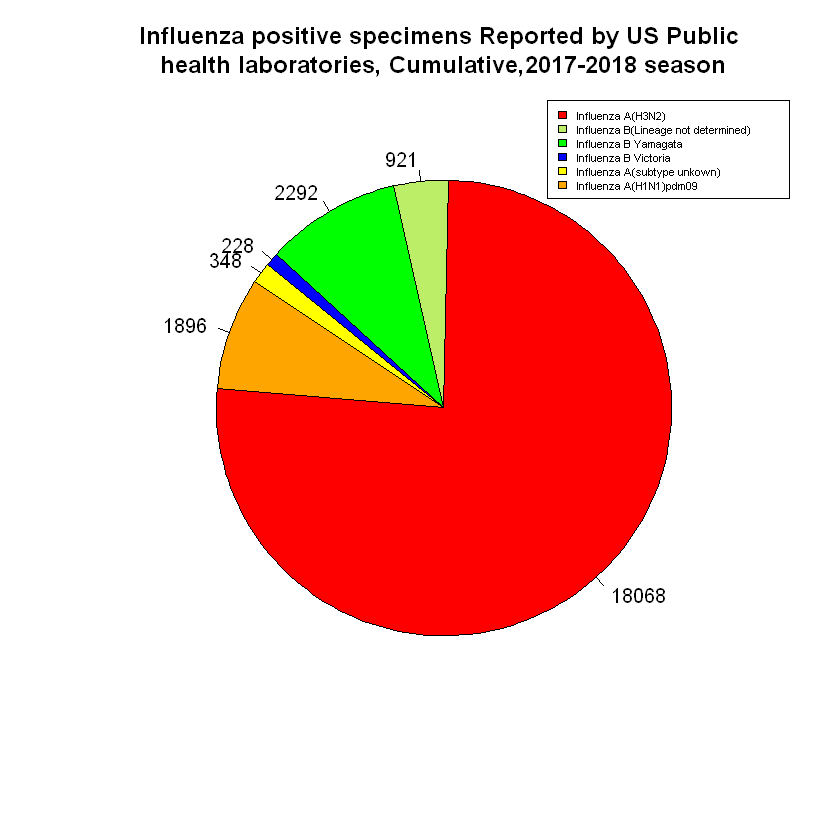

In [2]:
#Problem 2b : Influenza Virus Characterization Main Pie chart

#Load Influenza Virus Characterization_Main_Pie
Positive_results<-read.csv(file.choose(), header=T)

value<-c(sum(Positive_results$A.H3.),sum(Positive_results$B),sum(Positive_results$BYAM),sum(Positive_results$BVIC),sum(Positive_results$A.Subtyping.not.performed.),sum(Positive_results$A..H1N1.pdm09))
color<-c("red","darkolivegreen2","green","blue","yellow","orange")
pie(value,labels=value,col=color,main="Influenza positive specimens Reported by US Public \nhealth laboratories, Cumulative,2017-2018 season",init.angle = 175)
legend("topright",c("Influenza A(H3N2)","Influenza B(Lineage not determined)","Influenza B Yamagata","Influenza B Victoria","Influenza A(subtype unkown)","Influenza A(H1N1)pdm09"), cex=0.55, fill=color)

Warning message:
"package 'cowplot' was built under R version 3.4.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.3"
Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave

Warning message:
"package 'scales' was built under R version 3.4.3"

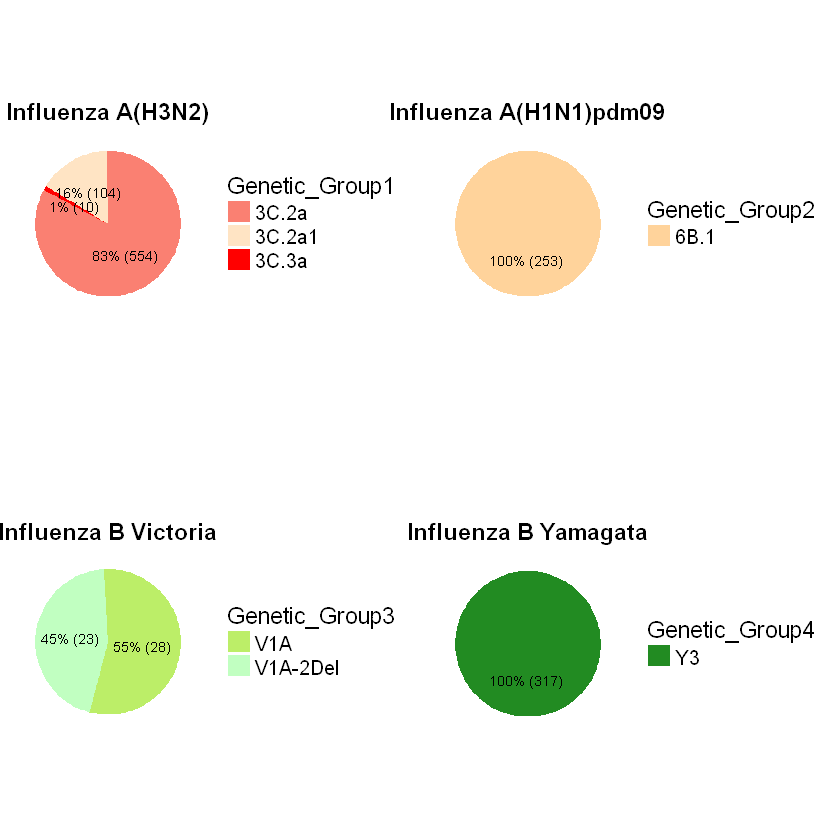

In [3]:
#Problem 2b: Influenza Virus Characterization Sub Pie charts

library(cowplot)
library(ggplot2)
library(scales)

value1<-c(554,104,10)
value2<-c(253)
value3<-c(28,23)
value4<-c(317)
IF1 <- data.frame(  Genetic_Group1<-c("3C.2a","3C.2a1","3C.3a"), Percentage_value1<-c(83,16,1))
IF2 <- data.frame(  Genetic_Group2<-c("6B.1"), Percentage_value2<-c(100))
IF3 <- data.frame(  Genetic_Group3<-c("V1A","V1A-2Del"), Percentage_value3<-c(55,45))
IF4 <- data.frame(  Genetic_Group4<-c("Y3"), Percentage_value4<-c(100))


p1<-ggplot(IF1, aes(x="", y=Percentage_value1, fill=Genetic_Group1))+geom_bar(width = 1, stat = "identity")+coord_polar("y", start=5.2)+
  ggtitle("Influenza A(H3N2)")+  theme(axis.text = element_blank(),axis.title.x=element_blank(),axis.title.y=element_blank(),line = element_blank())+
  scale_fill_manual(values = c("3C.2a"="salmon","3C.2a1"="bisque","3C.3a"="red"))+geom_text(aes( label = paste0((percent(Percentage_value1/100))," (",value1,") " )), size=3,position = position_stack(vjust = 0.5))

p2<-ggplot(IF2, aes(x="", y=Percentage_value2, fill=Genetic_Group2))+geom_bar(width = 1, stat = "identity")+coord_polar("y", start=0)+
  ggtitle("Influenza A(H1N1)pdm09")+theme(axis.text = element_blank(),axis.title.x=element_blank(),axis.title.y=element_blank(),line = element_blank())+
  scale_fill_manual(values = c("6B.1"="burlywood1"))+geom_text(aes( label = paste0((percent(Percentage_value2/100))," (",value2,") " )), size=3,position = position_stack(vjust = 0.5))

p3<-ggplot(IF3, aes(x="", y=Percentage_value3, fill=Genetic_Group3))+geom_bar(width = 1, stat = "identity")+coord_polar("y", start=3.4)+
  ggtitle("Influenza B Victoria")+theme(axis.text = element_blank(),axis.title.x=element_blank(),axis.title.y=element_blank(),line = element_blank())+
  scale_fill_manual(values = c("V1A"="darkolivegreen2","V1A-2Del"="darkseagreen1"))+geom_text(aes(label = paste0((percent(Percentage_value3/100))," (",value3,") " )), size=3,position = position_stack(vjust = 0.5))

p4<-ggplot(IF4, aes(x="", y=Percentage_value4, fill=Genetic_Group4))+geom_bar(width = 1, stat = "identity")+coord_polar("y", start=0)+
  ggtitle("Influenza B Yamagata")+theme(axis.text = element_blank(),axis.title.x=element_blank(),axis.title.y=element_blank(),line = element_blank())+
  scale_fill_manual(values = c("Y3"="forestgreen"))+geom_text(aes(label = paste0((percent(Percentage_value4/100))," (",value4,") " )), size=3,position = position_stack(vjust = 0.5))

plot_grid(p1,p2,p3,p4,nrow = 2,ncol=2)


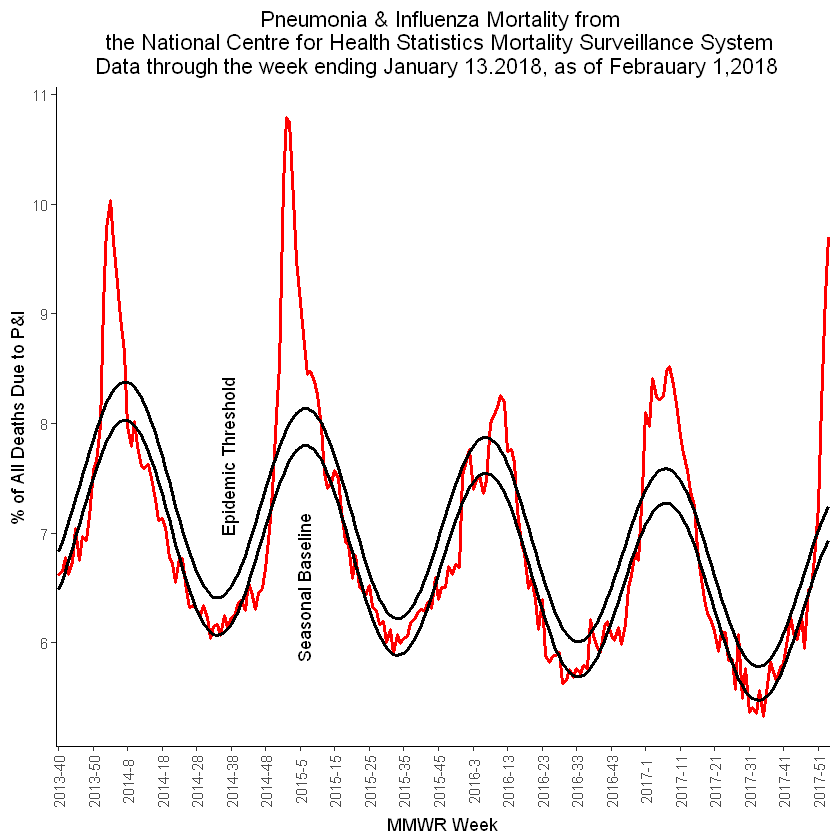

In [4]:
#Problem 3 : Pneumonia and Influenza mortality
library(ggplot2)

#Select the file "Pneumonia and Influenza mortality"
mortality<-read.csv(file.choose(), header=T)
mortality$Week = factor(mortality$Week,levels=unique(mortality$Week))

ggplot() + 
geom_smooth(data = mortality,aes(x = mortality$Week , y = mortality$Percent.of.Deaths.Due.to.Pneumonia.and.Influenza,group = 1),stat = "identity",color="red")  +
geom_smooth(data = mortality,aes(x = mortality$Week , y = mortality$Expected,group = 1),stat = "identity",color="black")+
geom_smooth(data = mortality,aes(x = mortality$Week , y = mortality$Threshold,group = 1),stat = "identity",color="black")+theme_bw()+
annotate("text", x = 72, y = 6.5, label = "Seasonal Baseline",angle = 90)+
annotate("text", x = 50, y = 7.7, label = "Epidemic Threshold",angle = 90)+
theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))+
xlab("MMWR Week")+ylab("% of All Deaths Due to P&I")+ggtitle("Pneumonia & Influenza Mortality from \nthe National Centre for Health Statistics Mortality Surveillance System 
Data through the week ending January 13.2018, as of Febrauary 1,2018  ")+scale_x_discrete(breaks = mortality$Week[c(T,F,F,F,F,F,F,F,F,F)])+
theme(plot.title = element_text(hjust = 0.5)) +theme(axis.text.x = element_text(angle = 90, vjust = 0.5))



Warning message:
"Removed 35 rows containing missing values (geom_smooth)."

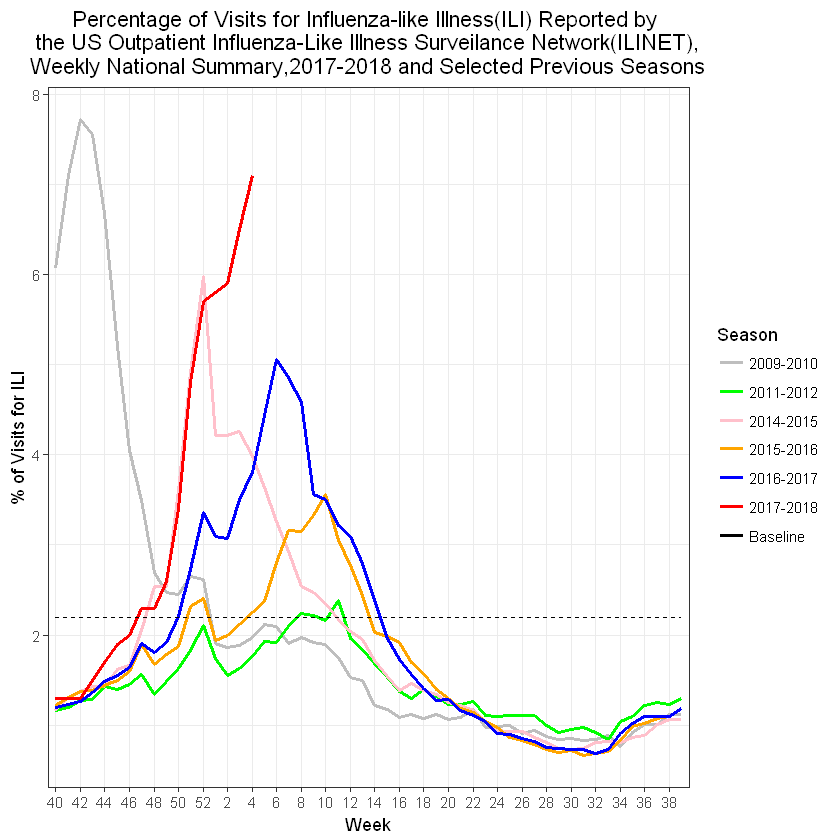

In [5]:
#Problem 4 : Percentage of Visits for Influenza like Illness
library(ggplot2)

visits<-read.csv(file.choose(), header=T)
#load this file "Percentage of Visits for Influenza like Illness"
visits$Week = factor(visits$Week,levels=unique(visits$Week))

ggplot() + 
geom_smooth(data = visits,aes(x = visits$Week , y = visits$X2009.2010,group = 1,color="2009-2010"),stat = "identity")+
geom_smooth(data = visits,aes(x = visits$Week , y = visits$X2011.2012,group = 1,color="2011-2012"),stat = "identity")+
geom_smooth(data = visits,aes(x = visits$Week , y = visits$X2014.2015,group = 1,color="2014-2015"),stat = "identity")+
geom_smooth(data = visits,aes(x = visits$Week , y = visits$X2015.2016,group = 1,color="2015-2016"),stat = "identity")+
geom_smooth(data = visits,aes(x = visits$Week , y = visits$X2016.2017,group = 1,color="2016-2017"),stat = "identity")+
geom_smooth(data = visits,aes(x = visits$Week , y = visits$X2017.2018,group = 1,color="2017-2018"),stat = "identity")+
geom_line(data = visits,aes(x = visits$Week , y = visits$Baseline,group = 1,color="Baseline"),stat = "identity",linetype = "dashed")+
xlab("Week")+ylab("% of Visits for ILI")+ scale_colour_manual(name="Season", values=c("grey","green","pink","orange","blue","red","black"))+
scale_x_discrete(breaks = visits$Week[c(T,F)])+theme( panel.grid.major = element_blank(),panel.grid.minor = element_blank())+theme_bw()+
ggtitle("Percentage of Visits for Influenza-like Illness(ILI) Reported by \nthe US Outpatient Influenza-Like Illness Surveilance Network(ILINET),
Weekly National Summary,2017-2018 and Selected Previous Seasons")+theme(plot.title = element_text(hjust = 0.5)) 

Warning message:
"package 'maps' was built under R version 3.4.3"

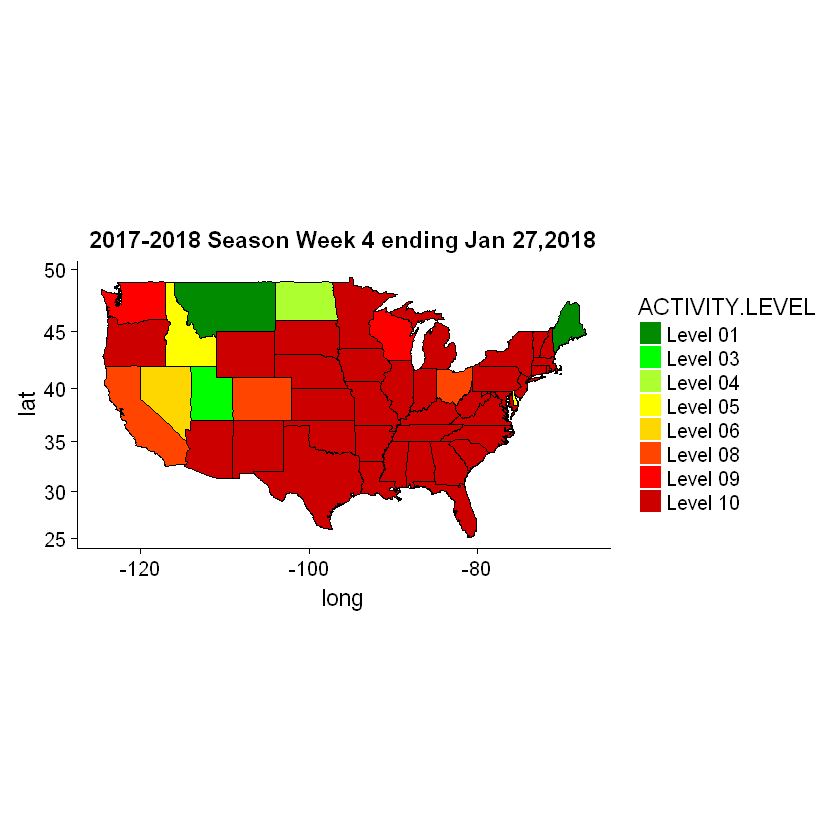

In [6]:
#Problem 5: Plot the heat map ILINet State Activity Indicator Map:
  library(ggplot2)
  library(maps)
  
  US_states <- map_data("state")
  
  #Please choose the file ILI State Activity Indicatot Map
  cdc_data<-read.csv(file.choose(), header=T) 
  
  merged_data<- merge(US_states,cdc_data, by="region")
  
  
  ggplot(merged_data, aes(x=long,y=lat,group=group))+geom_polygon(aes(fill = ACTIVITY.LEVEL))+geom_path()+
  coord_map()+ggtitle("2017-2018 Season Week 4 ending Jan 27,2018")+ theme(plot.title = element_text(hjust = 0.5))+
    scale_fill_manual(values = c("green4","green","greenyellow","yellow","gold","orangered","red","red3"))
  

  
